In [18]:
import tensorflow as tf

In [19]:
import numpy as np

In [20]:
import matplotlib.pyplot as plt

In [21]:
%matplotlib inline

In [22]:
from sklearn.utils import shuffle

In [23]:
#utworze teraz dane jakies
def kolko_w_kolku(sig1=0.4,sig2=0.6,R2=1.,N=1000):
    """to ma utworzyc dane ktore posluza mi do sprawdzenia czy i jak dziala model"""
    features=[]
    labels=[]
    for i in range(N):
        x=np.random.normal(0,sig1)
        y=np.random.normal(0,sig1)
        features.append([x,y])
        labels.append(0)
    for i in range(N):
        alpha=np.random.uniform()*2*np.pi
        delr=np.random.normal(0,sig2)
        r=R2+delr
        x=np.cos(alpha)*r
        y=np.sin(alpha)*r
        features.append([x,y])
        labels.append(1)
    features=np.array(features)
    labels=np.array(labels)
    features,labels=shuffle(features,labels)
    return features,labels

In [24]:
def rysoj_dane(f,l):
    plt.clf()
    plt.scatter(f[:,0],f[:,1],c=l,s=5)

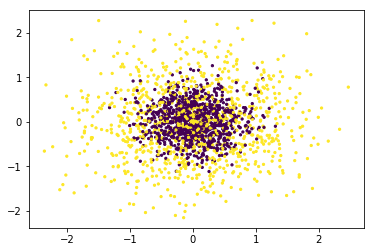

In [25]:
f,l=kolko_w_kolku()
rysoj_dane(f,l)

In [26]:
#teraz sproboje z tego zrobic jakis dataset

In [27]:
f,l=kolko_w_kolku()

In [28]:
dataset = tf.data.Dataset.from_tensor_slices((f,l))

In [29]:
BATCH_SIZE=100
zbachowany=dataset.shuffle(1000).repeat().batch(BATCH_SIZE)

In [30]:
#to jest dataset zaraz zastanowie sie jak go zapisac do pliku i z tego pliku odczytac a teraz jak go czytac?

In [31]:
iterator = zbachowany.make_one_shot_iterator()

In [32]:
f,l=iterator.get_next()

In [34]:
with tf.Session() as sess:
    for i in range(100):
        sess.run(l)
    

In [47]:
def wrap_int64(value):
    """lista intow musi wlesc"""
    return tf.train.Feature(int64_list=tf.train.Int64List(value=value))
def wrap_float64(value):
    """lista floatow musi wlesc"""
    return tf.train.Feature(float_list=tf.train.FloatList(value=value))

    

In [50]:
wrap_float64([5.55,6.85])

float_list {
  value: 5.550000190734863
  value: 6.849999904632568
}

In [51]:
f,l=kolko_w_kolku()

In [52]:
def wpisz(out_path):
    """tworzy ten nasz dataset"""
    f,l=kolko_w_kolku()
    with tf.python_io.TFRecordWriter(out_path) as writer:
        for i in range(len(f)):
            feature=f[i]
            label=l[i]
            data = {
                 'feature': wrap_float64(feature),
                'label': wrap_int64([label])
                    }
            # Wrap the data as TensorFlow Features.
            feature = tf.train.Features(feature=data)

            # Wrap again as a TensorFlow Example.
            example = tf.train.Example(features=feature)

            # Serialize the data.
            serialized = example.SerializeToString()

            # Write the serialized data to the TFRecords file.
            writer.write(serialized)
    
        
    

In [53]:
wpisz("dane_treningowe")